# Final project: EDA

Import libraries

In [1]:
import numpy as np
from datetime import datetime
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns

import data_io

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## EDA and Data Cleansing

In the next sections we first analyze the provided files one by one and then we perform a joint comarison

### Daily sales

We start with the analysis of the daily sales table. This table contains the sales by date, shop and item, where we get the price and number of sold units per row. For convenience, let's parse the sales dates into datetime and extract day, month and year and then show the table information. Let's calculate also the revenue per day, which is interesting for analysis

In [2]:
sales_daily_df=data_io.get_sales_df()

sales_daily_df.date=pd.to_datetime(sales_daily_df.date, format='%d.%m.%Y')
sales_daily_df['year']=sales_daily_df.date.dt.year
sales_daily_df['month']=sales_daily_df.date.dt.month
sales_daily_df['day']=sales_daily_df.date.dt.day
sales_daily_df['revenue']=sales_daily_df.item_cnt_day*sales_daily_df.item_price



print(sales_daily_df.info())
print(sales_daily_df.describe())

sales_daily_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
year              int64
month             int64
day               int64
revenue           float64
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 224.0 MB
None
       date_block_num       shop_id       item_id    item_price  item_cnt_day  \
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06   
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00   
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00   
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01   
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00   
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,revenue
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2,999.00
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,3,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1,5,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,6,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15,1099.00


The field date_block_num counts the number of months since the beggining of the history. The last value is 33, being October 2015. The test dataset would be therefore number 34. 

There are negative prices which might be outliers and also negative item sale counts. We assume that the latter indicates the number of returned itemsm, which may be useful to create features.

At first glance, the historic sales for every shop and item are the main information that we can use to predict future sales. On the other hand, I don't think that the item prices will be predictive for future sales, given that they are not provided in the test data.

 Next, we plot the dates and we ensure that the given data does not include data leaked from the test dataset

Timestamp('2015-10-31 00:00:00')

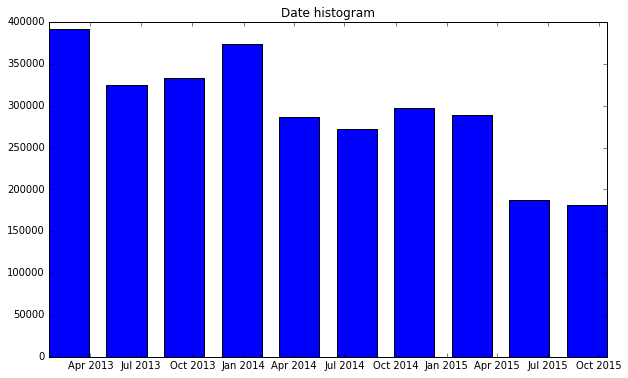

In [3]:
fig=plt.figure(figsize=(10,6))
x=plt.title('Date histogram');
ax=plt.hist(sales_daily_df.date, rwidth=0.7);

max(sales_daily_df.date)

Following, we show the distribution of item sales counts

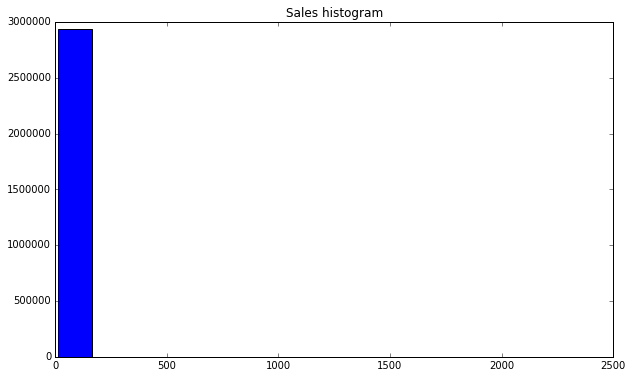

In [4]:
fig=plt.figure(figsize=(10,6))
x=plt.title('Sales histogram');
ax=plt.hist(sales_daily_df.item_cnt_day, rwidth=0.7);

Most of values are close to zero, except some outliers. All sales are above 0 since in other case the shop-item combination is not included

Following, we dive deeper into prices and sales, looking for outliers

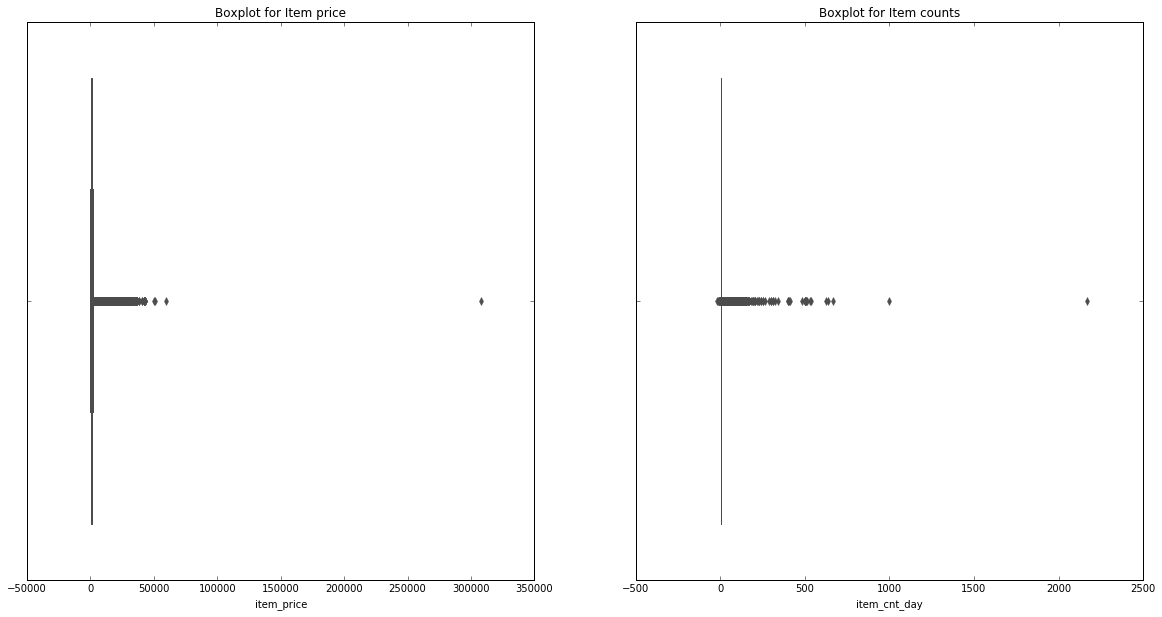

In [5]:
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10));
x=sns.boxplot(x='item_price', data = sales_daily_df, ax = ax[0])
x=ax[0].set_title('Boxplot for Item price');
x=sns.boxplot(x='item_cnt_day', data = sales_daily_df, ax = ax[1])
x=ax[1].set_title('Boxplot for Item counts');
plt.show()

It's quite clear that the boxplot for item price and item couns are mainly concentrated to small values (especially item counts ~0). The outliers can be easily identified as the values far away from the rest of the values. We take item prices greater than 100000 and item counts greater than 1000 as the outliers. In addition, as stated before, negative prices do not make sense, so we remove them as well. 

In [6]:
sales_daily_df = sales_daily_df.loc[(sales_daily_df.item_price < 100000) & (sales_daily_df.item_cnt_day <= 1000) & (sales_daily_df.item_price >=0)]

Now, let's analyze the distribution of item sales and revenue for every relevant column

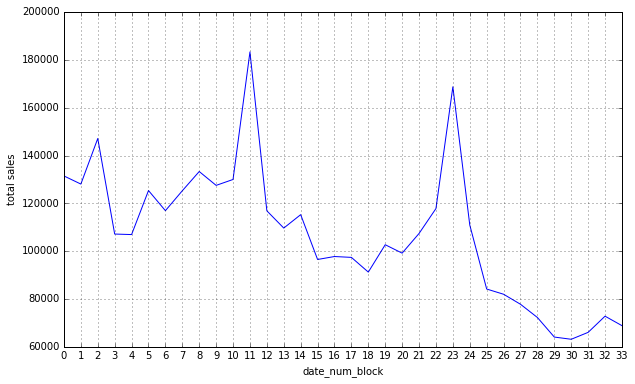

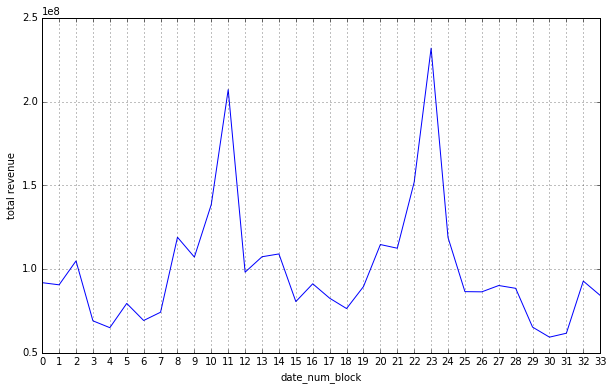

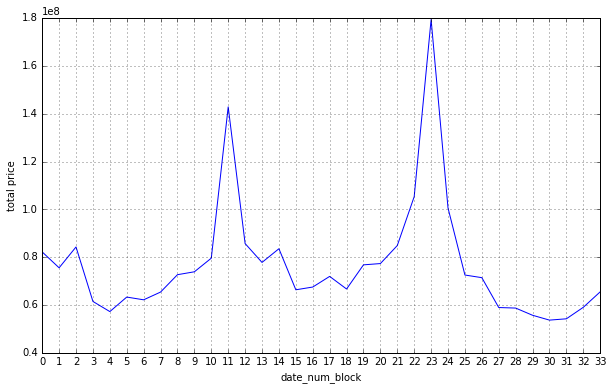

In [7]:

fig=plt.figure(figsize=(10,6))
x=plt.xticks(np.arange(0,34,1))
x=plt.xlabel('date_num_block');
x=plt.ylabel('total sales');
x=plt.grid();
ax=plt.plot(sales_daily_df.groupby('date_block_num')['item_cnt_day'].sum());


fig=plt.figure(figsize=(10,6));
x=plt.xticks(np.arange(0,34,1))
x=plt.xlabel('date_num_block');
x=plt.ylabel('total revenue');
x=plt.grid();
ax=plt.plot(sales_daily_df.groupby('date_block_num')['revenue'].sum());


fig=plt.figure(figsize=(10,6));
x=plt.xticks(np.arange(0,34,1));
x=plt.xlabel('date_num_block');
x=plt.ylabel('total price');
x=plt.grid();
x=plt.plot(sales_daily_df.groupby('date_block_num')['item_price'].sum());


We can observe a clear descending trend in the sales plot and two spikes in the three plots that correspond clearly to the month of December and are likely due to the Christmas period. Also, there is a notable year seasonality. We should take this into account when creating features on lagged values

We have been told that the shops and products vary from month to month. Below we show how this happened in the training data

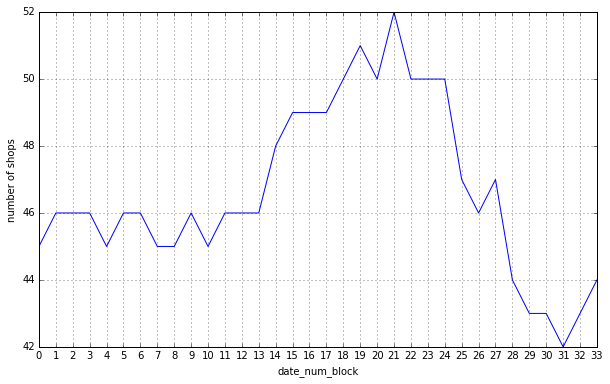

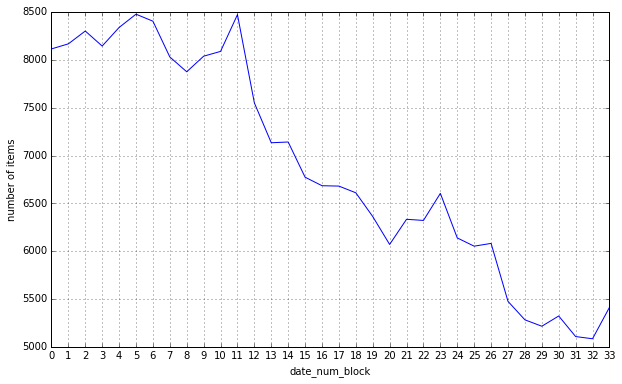

In [8]:
fig=plt.figure(figsize=(10,6))
x=plt.xticks(np.arange(0,34,1));
x=plt.xlabel('date_num_block');
x=plt.ylabel('number of shops');
x=plt.grid();
ax=plt.plot(sales_daily_df.groupby('date_block_num')['shop_id'].nunique())

fig=plt.figure(figsize=(10,6))
x=plt.xticks(np.arange(0,34,1));
x=plt.xlabel('date_num_block');
x=plt.ylabel('number of items');
x=plt.grid();
ax=plt.plot(sales_daily_df.groupby('date_block_num')['item_id'].nunique())


Our models need to be very robust against this situations. This is, when a new shop or item or item for a given shop is introduced, it's going to be hard to predict the corresponding sales as there is no historic data.

### Items

In [9]:
items_df=data_io.get_items_df()

print(items_df.info())
print(items_df.describe())

items_df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
           item_id  item_category_id
count  22170.00000      22170.000000
mean   11084.50000         46.290753
std     6400.07207         15.941486
min        0.00000          0.000000
25%     5542.25000         37.000000
50%    11084.50000         40.000000
75%    16626.75000         58.000000
max    22169.00000         83.000000


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


We have 22170 items, grouped in 84 categories. The item names are in Russian, which complicates the analysis, but they are likely to be important for prediction. Let's look at the number of items for every category.

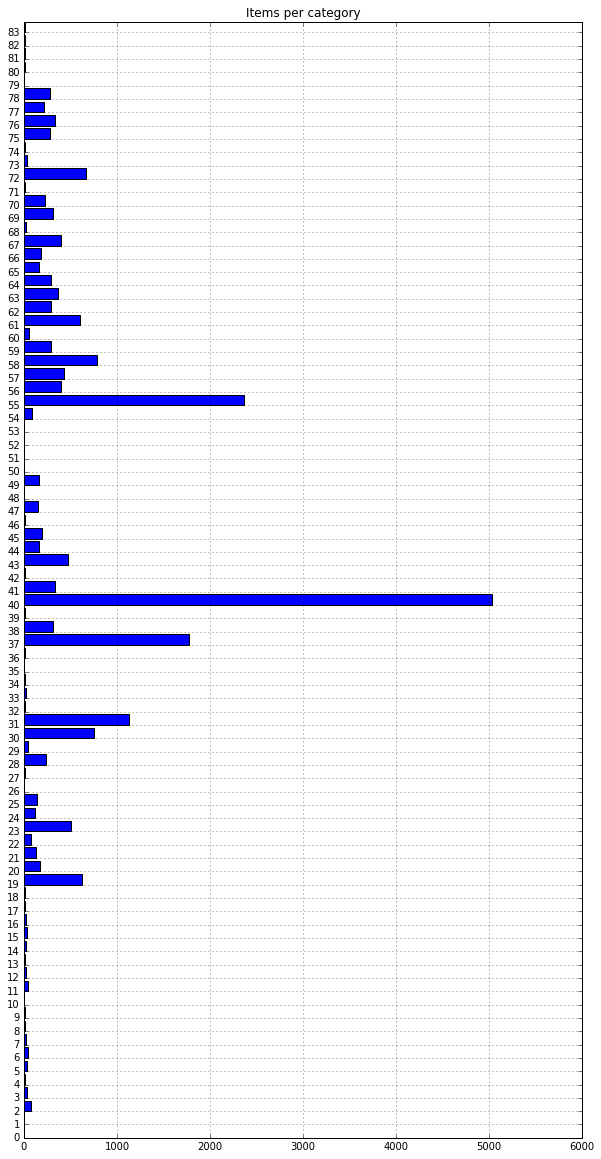

In [10]:
fig=plt.figure(figsize=(10,20))
x=plt.title('Items per category')
x=plt.yticks(np.arange(0,84,1))
x=plt.grid()
group=items_df.groupby('item_category_id').item_id.count()

ax=plt.barh(group.index, group)


### Item categories

In [11]:
item_categories_df=data_io.get_item_categories_df()

print(item_categories_df.info())
print(item_categories_df.describe())

item_categories_df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
       item_category_id
count         84.000000
mean          41.500000
std           24.392622
min            0.000000
25%           20.750000
50%           41.500000
75%           62.250000
max           83.000000


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


We have 84 categories. The names may help, specially after noticing that there are some subcategories embedded in them. Let's parse them:

In [12]:
item_categories_df['split'] = item_categories_df['item_category_name'].str.split('-')
item_categories_df['category_type'] = item_categories_df['split'].map(lambda x: x[0].strip())
item_categories_df['category_subtype'] = item_categories_df['split'].map(lambda x: ' '.join(x[1:]).strip() if len(x) > 1 else x[0].strip())

item_categories_df.drop(columns=['split'], inplace=True)
item_categories_df.head()


,item_category_name,item_category_id,category_type,category_subtype
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники
1,Аксессуары - PS2,1,Аксессуары,PS2
2,Аксессуары - PS3,2,Аксессуары,PS3
3,Аксессуары - PS4,3,Аксессуары,PS4
4,Аксессуары - PSP,4,Аксессуары,PSP


With this supercategories we should be able to build useful features

### Shops

In [13]:
shops_df=data_io.get_shops_df()

print(shops_df.info())
print(shops_df.describe())
shops_df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
None
         shop_id
count  60.000000
mean   29.500000
std    17.464249
min     0.000000
25%    14.750000
50%    29.500000
75%    44.250000
max    59.000000


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


We have 60 shops. The names may also help, specially after noticing that the first word in the shop names looks to be the city name. Let's parse it

In [14]:
shops_df['split'] = shops_df['shop_name'].str.split(' ')
shops_df['city_name'] = shops_df['split'].map(lambda x: x[0].strip())
shops_df['short_shop_name'] = shops_df['split'].map(lambda x: ' '.join(x[1:]).strip())
shops_df.head()

,shop_name,shop_id,split,city_name,short_shop_name
0,"!Якутск Орджоникидзе, 56 фран",0,"[!Якутск, Орджоникидзе,, 56, фран]",!Якутск,"Орджоникидзе, 56 фран"
1,"!Якутск ТЦ ""Центральный"" фран",1,"[!Якутск, ТЦ, ""Центральный"", фран]",!Якутск,"ТЦ ""Центральный"" фран"
2,"Адыгея ТЦ ""Мега""",2,"[Адыгея, ТЦ, ""Мега""]",Адыгея,"ТЦ ""Мега"""
3,"Балашиха ТРК ""Октябрь-Киномир""",3,"[Балашиха, ТРК, ""Октябрь-Киномир""]",Балашиха,"ТРК ""Октябрь-Киномир"""
4,"Волжский ТЦ ""Волга Молл""",4,"[Волжский, ТЦ, ""Волга, Молл""]",Волжский,"ТЦ ""Волга Молл"""


### Joint analysis

Following we join sales with items, shops and item categories such that we can compute joint visualizations. Before that, we aggregate the sales by month, as is what we need to predict, reducing the computational burden in the process. The features that we will use in our models will come from this joint dataset as well.

In [15]:
sales_daily_df = pd.merge(sales_daily_df, shops_df, on=['shop_id'], how='left')
sales_daily_df = pd.merge(sales_daily_df, items_df, on=['item_id'], how='left')
sales_daily_df = pd.merge(sales_daily_df, item_categories_df, on=['item_category_id'], how='left')

sales_daily_df.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,revenue,shop_name,split,city_name,short_shop_name,item_name,item_category_id,item_category_name,category_type,category_subtype
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2,999.00,"Ярославль ТЦ ""Альтаир""","[Ярославль, ТЦ, ""Альтаир""]",Ярославль,"ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Кино,Blu Ray
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,3,899.00,"Москва ТРК ""Атриум""","[Москва, ТРК, ""Атриум""]",Москва,"ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка,Винил
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1,5,-899.00,"Москва ТРК ""Атриум""","[Москва, ТРК, ""Атриум""]",Москва,"ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка,Винил
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,6,1709.05,"Москва ТРК ""Атриум""","[Москва, ТРК, ""Атриум""]",Москва,"ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,Музыка,Винил
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15,1099.00,"Москва ТРК ""Атриум""","[Москва, ТРК, ""Атриум""]",Москва,"ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,Музыка,CD фирменного производства


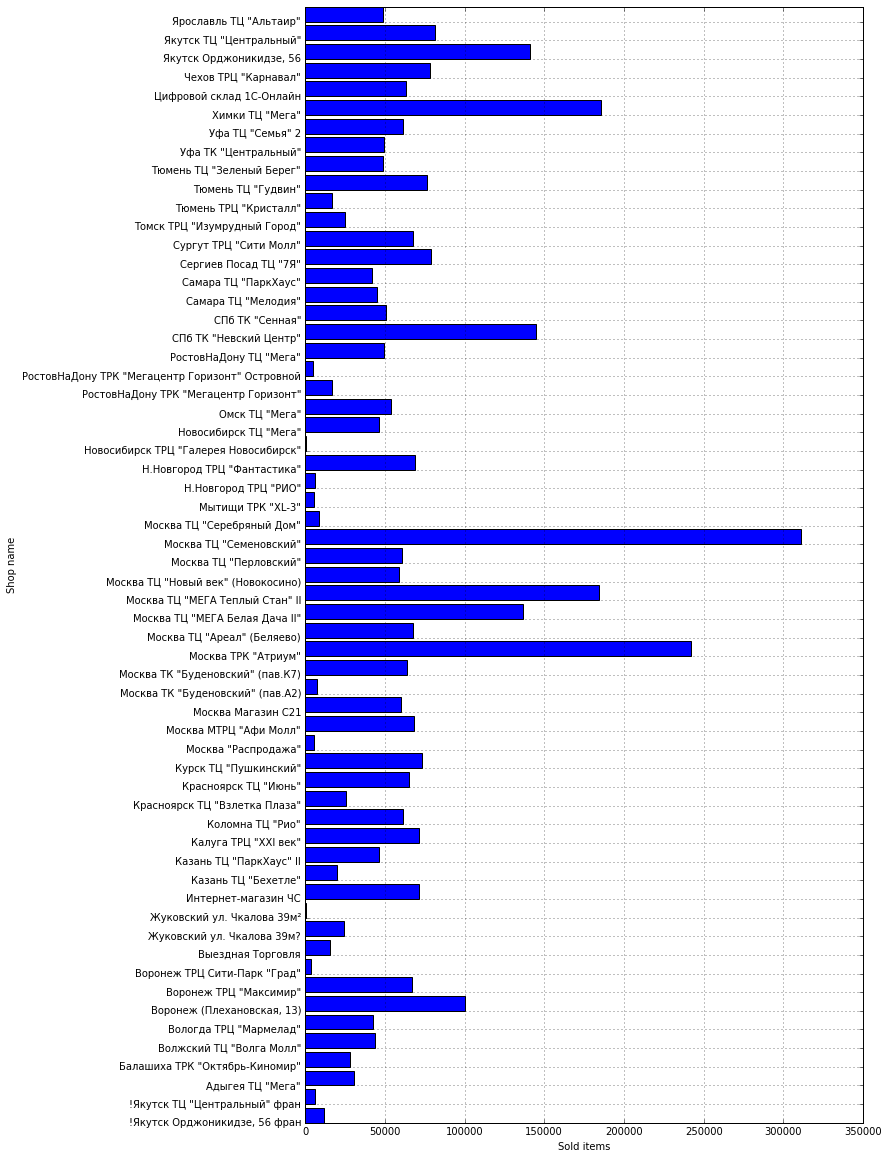

In [16]:
fig=plt.figure(figsize=(10,20))
x=plt.yticks(np.arange(0,60,1))
x=plt.xlabel('Sold items')
x=plt.ylabel('Shop name')
x=plt.grid()
group=sales_daily_df.groupby('shop_name').item_cnt_day.sum()
# ax=plt.bar(group)
ax=plt.barh(group.index, group)

As expected, the shops in Moscow are among the ones with more sales. The variance between shops is very significant

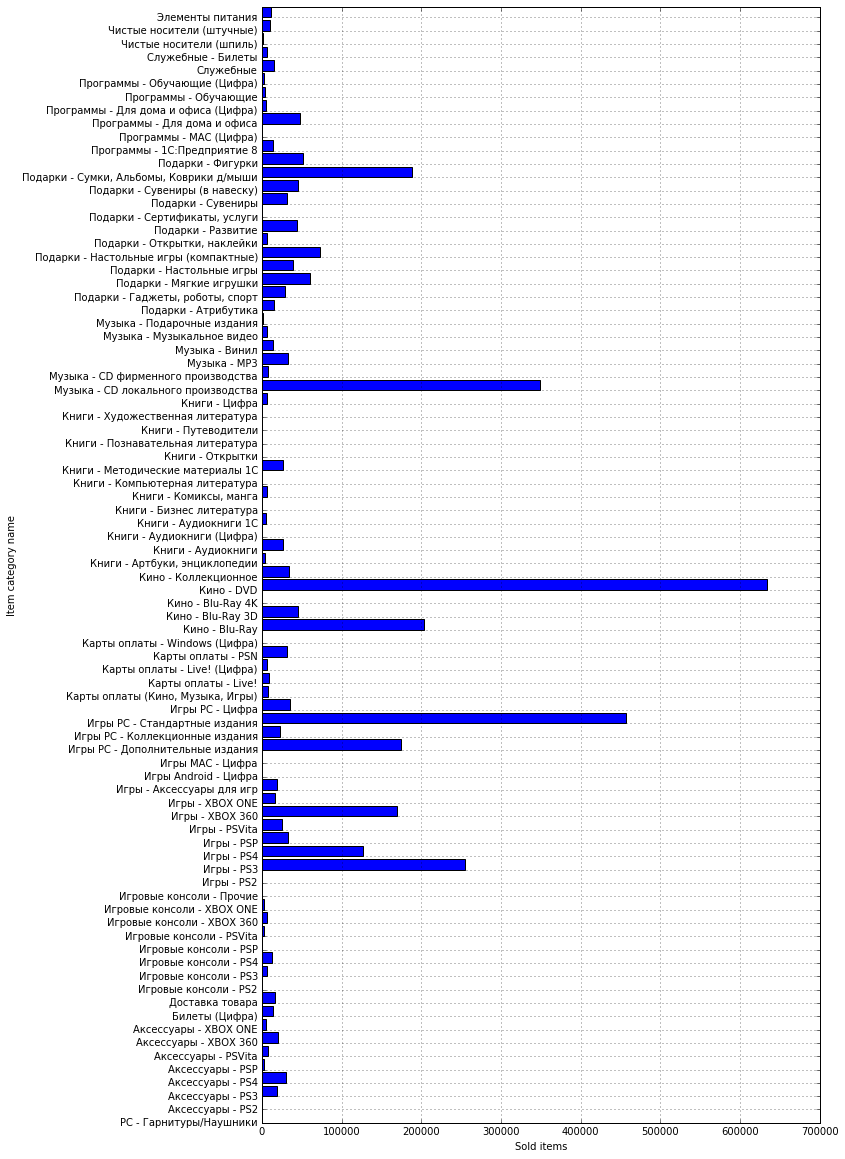

In [17]:
fig=plt.figure(figsize=(10,20))
x=plt.yticks(np.arange(0,84,1))
x=plt.xlabel('Sold items')
x=plt.ylabel('Item category name')
x=plt.grid()
group=sales_daily_df.groupby('item_category_name').item_cnt_day.sum()
# ax=plt.bar(group)
ax=plt.barh(group.index, group)


The most sold categories are CDs and DVDs, which makes sense as they are cheap products. Note also the high variance in the sales between categories.

### Comparison of train and test data (Data leaks)

It is of high importance to understand the distribution of the test dataset. That may help us to create a proper validation and to find data leaks. Let's load and examine it

In [18]:
test_df=data_io.get_test_df()

print(test_df.info())
print(test_df.describe())
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB
None
                  ID        shop_id        item_id
count  214200.000000  214200.000000  214200.000000
mean   107099.500000      31.642857   11019.398627
std     61834.358168      17.561933    6252.644590
min         0.000000       2.000000      30.000000
25%     53549.750000      16.000000    5381.500000
50%    107099.500000      34.500000   11203.000000
75%    160649.250000      47.000000   16071.500000
max    214199.000000      59.000000   22167.000000


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


The test dataset only comes with item-shop pairs, and we need to predict sales for a month which is not included in the trainig. Therefore, the amount of leaks that we may find is limited to the distribution of items and shop identifiers

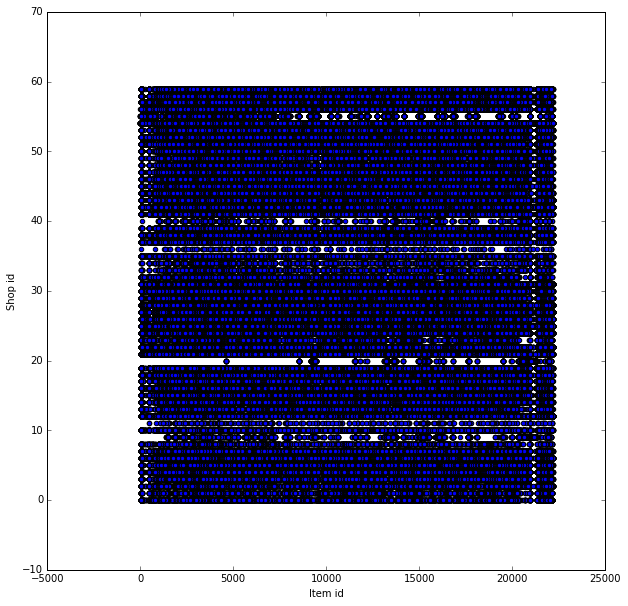

In [19]:
fig=plt.figure(figsize=(10,10))
x=plt.xlabel('Item id')
x=plt.ylabel('Shop id')
ax=plt.scatter(sales_daily_df.item_id, sales_daily_df.shop_id)

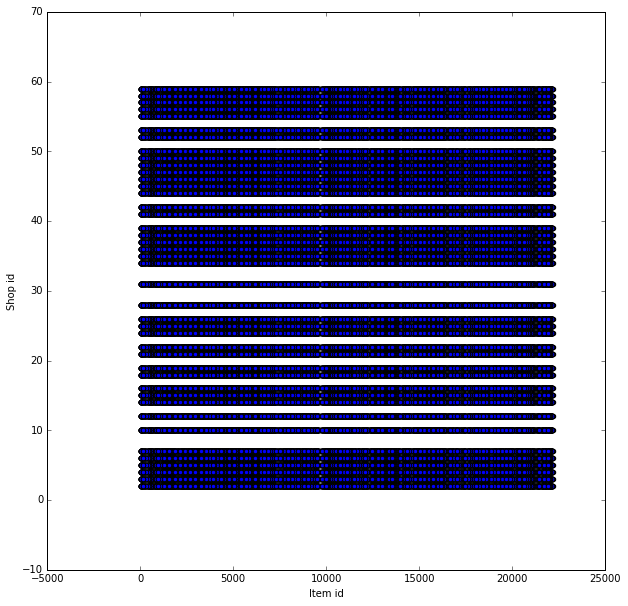

In [20]:
fig=plt.figure(figsize=(10,10))
x=plt.xlabel('Item id')
x=plt.ylabel('Shop id')
ax=plt.scatter(test_df.item_id, test_df.shop_id)

There are two important observations that can be drawn from the previous plots. The first one is that in the test dataset there are no "holes" in the sense that there are rows for all items for every shop, whereas in the training dataset the items not sold have not been included. The second is that some shops are not included in the test data, likely because they have been closed at some point. We should consider these facts when creating our training dataset.